In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('./Advertising_Data.csv')
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


# Variable Exploration

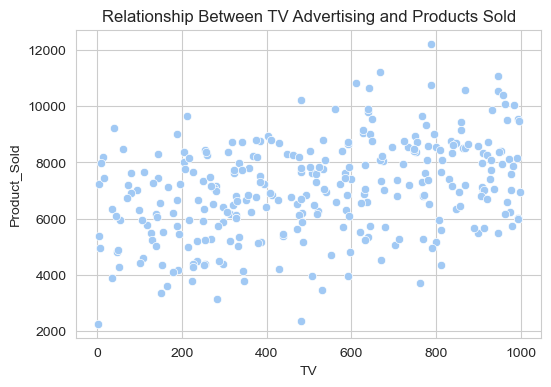

In [3]:
plt.figure(figsize = (6,4))

sns.scatterplot(data = df, x = 'TV', y = 'Product_Sold')

plt.title("Relationship Between TV Advertising and Products Sold")
plt.show()

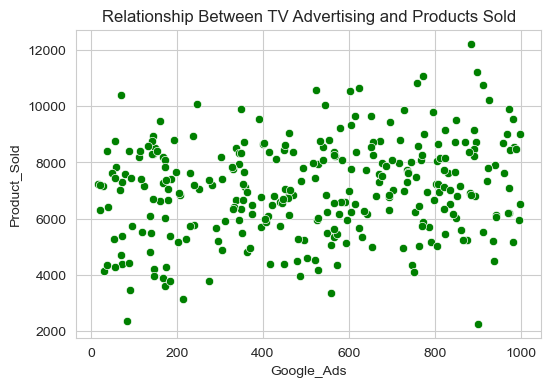

In [4]:
plt.figure(figsize = (6,4))

sns.scatterplot(data = df, x = 'Google_Ads', y = 'Product_Sold', color = 'green')

plt.title("Relationship Between TV Advertising and Products Sold")
plt.show()

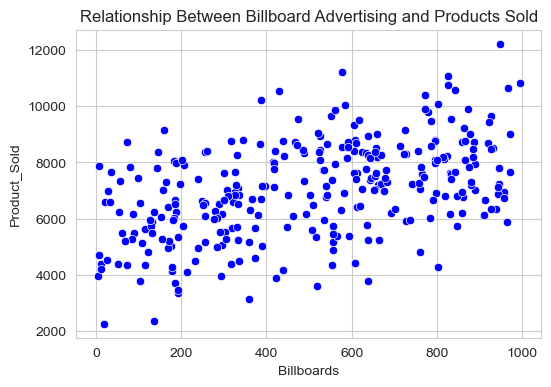

In [5]:
plt.figure(figsize = (6,4))

sns.scatterplot(data = df, x = 'Billboards', y = 'Product_Sold', color = 'blue')

plt.title("Relationship Between Billboard Advertising and Products Sold")
plt.show()

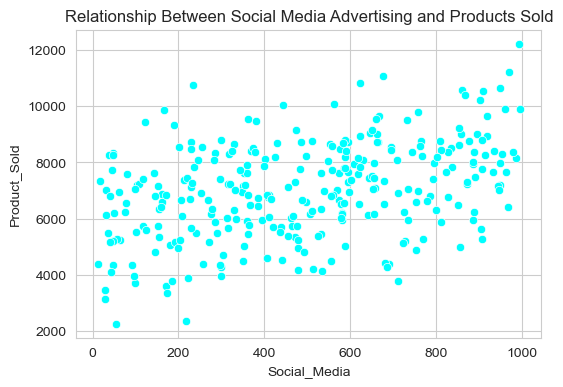

In [6]:
plt.figure(figsize = (6,4))

sns.scatterplot(data = df, x = 'Social_Media', y = 'Product_Sold', color = 'cyan')

plt.title("Relationship Between Social Media Advertising and Products Sold")
plt.show()

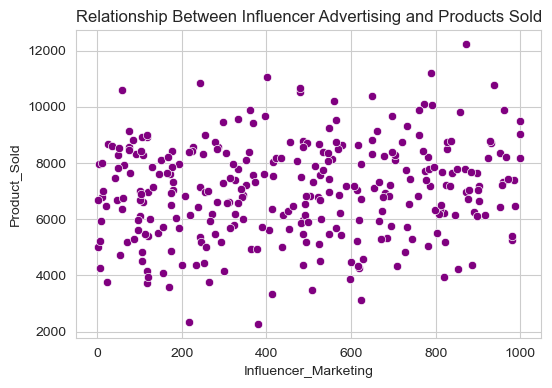

In [7]:
plt.figure(figsize = (6,4))

sns.scatterplot(data = df, x = 'Influencer_Marketing', y = 'Product_Sold', color = 'purple')

plt.title("Relationship Between Influencer Advertising and Products Sold")
plt.show()

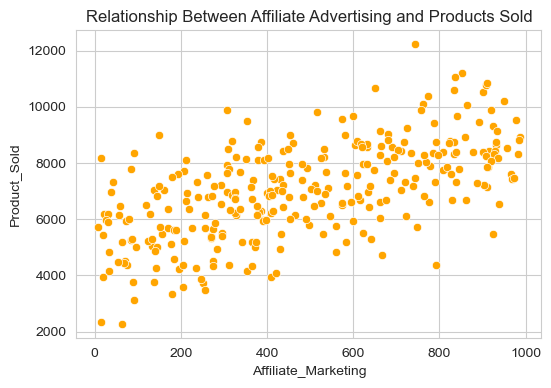

In [8]:
plt.figure(figsize = (6,4))

sns.scatterplot(data = df, x = 'Affiliate_Marketing', y = 'Product_Sold', color = 'orange')

plt.title("Relationship Between Affiliate Advertising and Products Sold")
plt.show()

Most of the variables seem to have a slight positive linear correlation with the number of Products Sold

# Correlation Heatmap

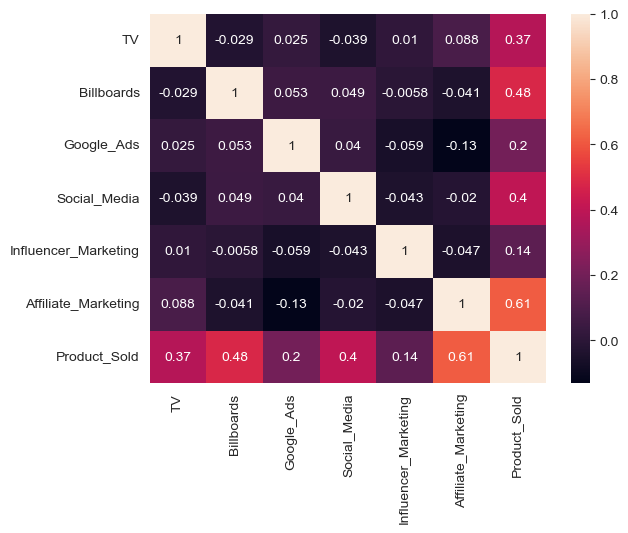

In [9]:
sns.heatmap(df.corr(), annot = True)
plt.show()

Since no variable is correlated with each other, we can use all variables as input into our model

# Data Pipeline

In [10]:
num_cols = ['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']

num_df = df[num_cols]

pipeline = Pipeline([
    ('Standard Scaler', StandardScaler())
])

data_prepared = pipeline.fit_transform(num_df)
data_prepared[0]

array([-0.82052482,  0.13129048, -1.36342942, -0.51384855, -0.77462434,
        1.53398893])

# Machine Learning Model

In [11]:
X = data_prepared
y = df.Product_Sold

X_test, X_train, y_test, y_train = train_test_split(X, y, train_size = .8, random_state = 21)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [12]:
xgb.score(X_test, y_test)

0.8003969186528215

In [13]:
predictions = xgb.predict(X_test)

average_error = mean_absolute_error(predictions, y_test)
print("Avg. Error with Xgb Regressor:", average_error)

Avg. Error with Xgb Regressor: 589.7645670572916


# Hyperparameter Tuning using GridSearchCV

In [14]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [.05, .1],
    'max_depth': [7,9],
}

xgb_grid = GridSearchCV(xgb, param_grid, scoring = 'neg_mean_absolute_error', cv = 10)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
           

In [15]:
best_params = xgb_grid.best_params_
best_params

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}

In [16]:
xgb_tuned = XGBRegressor(n_estimators = best_params['n_estimators'], max_depth = best_params['max_depth'],
                   learning_rate = best_params['learning_rate'])
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [17]:
tuned_predictions = xgb.predict(X_test)

tuned_average_error = mean_absolute_error(tuned_predictions, y_test)
print("Avg. Error with Xgb Regressor:", average_error)

Avg. Error with Xgb Regressor: 589.7645670572916


# Modeling with Tensorflow

In [18]:
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [19]:
X = df[num_cols]
y = df.Product_Sold

X_test, X_train, y_test, y_train = train_test_split(X, y, train_size = .8, random_state=42)

X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1,1)

feature_normalizer = tf.keras.layers.Normalization(axis = -1)
feature_normalizer.adapt(X_train)

X_train_norm = feature_normalizer(X_train)

In [20]:
# define the model where the number of units represents the number of neurons in each layer

model = Sequential([
    Dense(units = 50, activation = 'linear', kernel_regularizer = tf.keras.regularizers.l2(.1)),
    Dense(units = 25, activation = 'linear', kernel_regularizer = tf.keras.regularizers.l2(.1)),
    Dense(units = 1, activation = 'linear', kernel_regularizer = tf.keras.regularizers.l2(.1))
])

In [21]:
# define loss function
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = 'mean_absolute_error'
)

In [22]:
# train model

history = model.fit(
    X_train_norm,
    y_train,
    epochs = 1000, # iterations
    verbose = 0, # suppress logging
    validation_split = .2 # calculate validation results on 20% of data
)

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
995,264.163177,298.439514,995
996,260.485870,175.288879,996
997,209.714600,373.238892,997
998,298.724731,303.538727,998
999,358.321533,269.352234,999


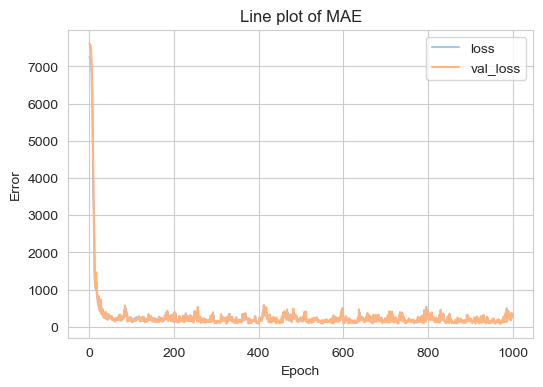

In [24]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title("Line plot of MAE")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [25]:
# normalize input values
X_test_norm = feature_normalizer(X_test)

predictions = model.predict(X_test_norm)

8/8 [==============================] - 0s 572us/step


In [26]:
tf_error = mean_absolute_error(predictions, y_test)
tf_error

270.26987915039064